# Haberman's Survival Exploratory Data Analysis

**Data:** Haberman's survival dataset is a collection of cases from a study which was conducted at University of Chicago's billing hospital on the survival of the patients who had undergone breast surgery. This case study was conducted between 1958 and 1970. 

**Features:** 
1. Age of patient - Numerical
2. Year of Operation - Numerical
3. No. of positive auxiliary nodes detected - numerical
4. Survival Status - 1(patient survived 5 years or longer) and 2(patient died within 5 years)

**Objective:** Perform exploratory data analysis on Haberman's survival dataset to identify the features which are useful in determining survival status of a patient.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set(color_codes=True)

In [2]:
#reading dataframe
df = pd.read_csv('./Data/haberman.csv')

In [3]:
#finding number of rows and columns
print(df.shape)

(305, 4)


Number of columns = 4
Number of rows = 305
The dataset is having very less number of rows.

In [4]:
print(df.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


This dataset is not having column names, so we need to add column names.

In [5]:
#setting dataframe column names
df.columns = ['age', 'operation_year', 'auxil_node', 'survival_status']

In [6]:
print(df.head())

   age  operation_year  auxil_node  survival_status
0   30              62           3                1
1   30              65           0                1
2   31              59           2                1
3   31              65           4                1
4   33              58          10                1


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                305 non-null int64
operation_year     305 non-null int64
auxil_node         305 non-null int64
survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Observations:
1. There are no missing values in this dataset.
2. survival_status column is integer, it has to be converted to categorical datatype.

In [8]:
print(df['survival_status'].unique())

[1 2]


In [9]:
print(df['survival_status'].value_counts())

1    224
2     81
Name: survival_status, dtype: int64


Observation:
This dataset is imbalanced.

In [10]:
#mapping numeric values to categorical
df['survival_status'] = df['survival_status'].map({1:"YES",2:"NO"})
df['survival_status'] = df['survival_status'].astype('category')

In [11]:
print(df.describe())

              age  operation_year  auxil_node
count  305.000000      305.000000  305.000000
mean    52.531148       62.849180    4.036066
std     10.744024        3.254078    7.199370
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     61.000000       66.000000    4.000000
max     83.000000       69.000000   52.000000


Observation:
Positive auxiliary lymph node value varies between 0 to 52, but 75% people are having less than or equal to 4 nodes.  

### Univariate Analysis:

**Histograms and PDF:**

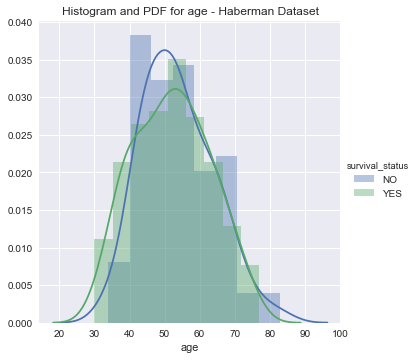

In [12]:
#plotting PDF and histograms for age data
fg = sns.FacetGrid(df, hue='survival_status', size=5)
fg.map(sns.distplot, 'age').add_legend()
plt.title('Histogram and PDF for age - Haberman Dataset')
plt.show()
plt.close()

Observation:
PDF plot for age data is highly mixed up.

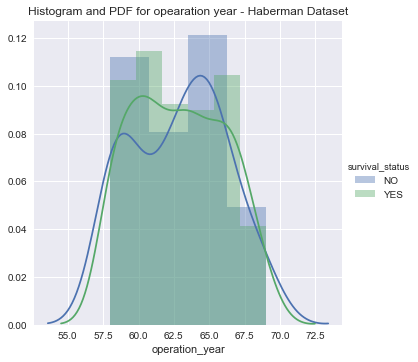

In [13]:
#plotting PDF and histograms for operation_year data
fg = sns.FacetGrid(df, hue='survival_status', size=5)
fg.map(sns.distplot, 'operation_year').add_legend()
plt.title('Histogram and PDF for opearation year - Haberman Dataset')
plt.show()
plt.close()

Observation:
PDF for operation year data shows that more patients died within 5 years who were opearted between years 1963 to 1966.

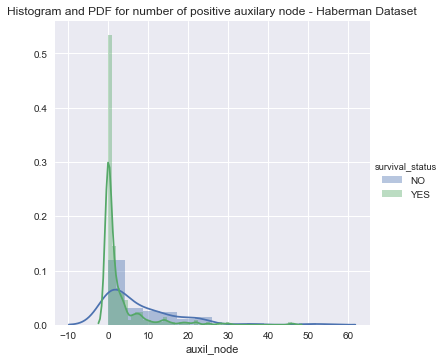

In [14]:
#plotting PDF and histograms for auxil_node data
fg = sns.FacetGrid(df, hue='survival_status', size=5)
fg.map(sns.distplot, 'auxil_node').add_legend()
plt.title('Histogram and PDF for number of positive auxilary node - Haberman Dataset')
plt.show()
plt.close()

Observation:
Plot for positive auxilary lymph nodes is highly right skewed with peak value near 0 which shows that patients who are having less lymph nodes have high chances of survival.

**CDF:**

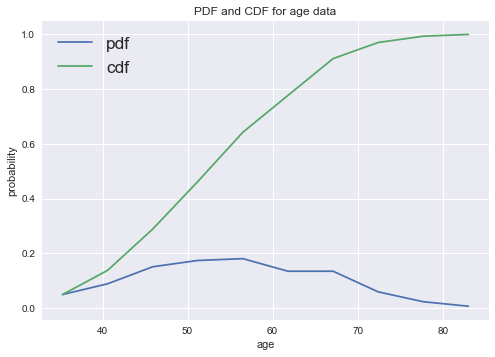

In [15]:
#CDF for age data
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], pdf, label = 'pdf')
ax.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('age')
plt.ylabel('probability')
plt.title('PDF and CDF for age data')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.close()

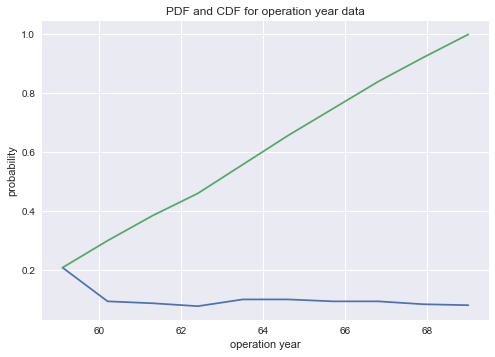

In [16]:
#CDF for opeartion year data
counts, bin_edges = np.histogram(df['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:],pdf)
ax.plot(bin_edges[1:], cdf)
plt.xlabel('operation year')
plt.ylabel('probability')
plt.title('PDF and CDF for operation year data')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.close()

Observation:
In the dataset 30% of the patients were oprated before year 1960.

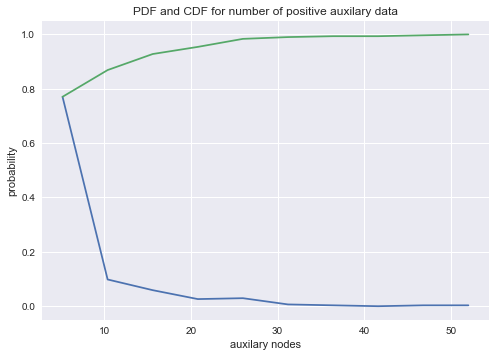

In [17]:
#CDF for positive auxilary node data
counts, bin_edges = np.histogram(df['auxil_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:],pdf)
ax.plot(bin_edges[1:], cdf)
plt.xlabel('auxilary nodes')
plt.ylabel('probability')
plt.title('PDF and CDF for number of positive auxilary data')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.close()

Observation:
75% of the patients were having less than 5 positive auxilary lymph nodes.

**Boxplots:**

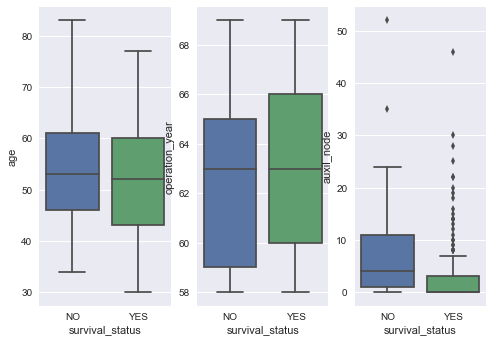

In [18]:
#plotting boxplot for each column in dataset
fig, axes = plt.subplots(1, 3)
for index, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.boxplot( x='survival_status', y = feature, data = df, ax = axes[index])
plt.show()

Observations:
1. Positive auxilary node column has most of the values which are less than 5.
2. Patients which are having age less than 45 have higher chances of survival.
3. Patients treated before 1960 have very less chances of survival.

**Violin Plot:**

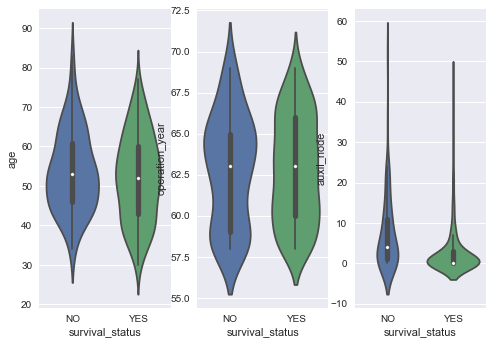

In [19]:
fig, axes = plt.subplots(1, 3)
for index, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.violinplot( x='survival_status', y = feature, data = df, ax = axes[index])
plt.show()

Observation:
Positive auxilary node column has most of the values which are less than 5.

### Bi-variate Analysis:

**Pairplotting:**

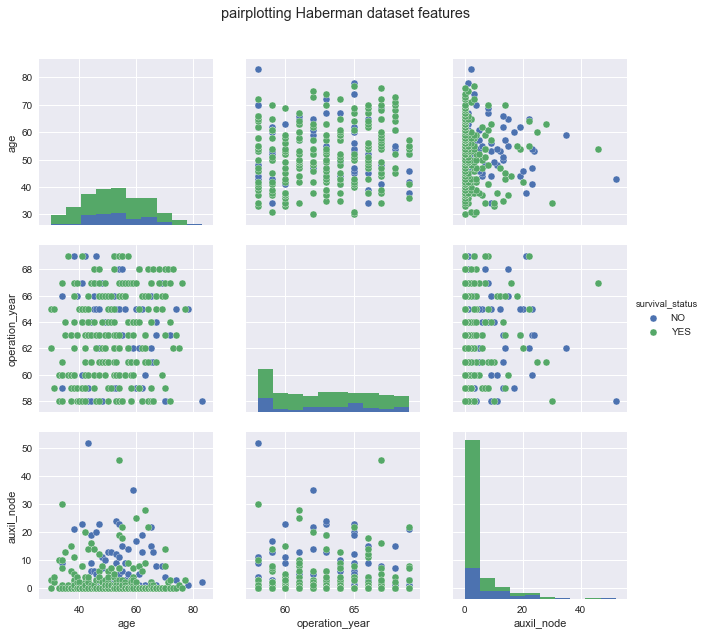

In [20]:
#pairplotting dataframe to identify features which are useful in seperating survival status
fg = sns.pairplot(df, hue = 'survival_status', size = 3)
plt.subplots_adjust(top=0.9)
fg.fig.suptitle('pairplotting Haberman dataset features')
plt.show()
plt.close()

Observation:
Operation year and number of positive auxilary nodes can help us to separate survival status.

**Contour Plot:**

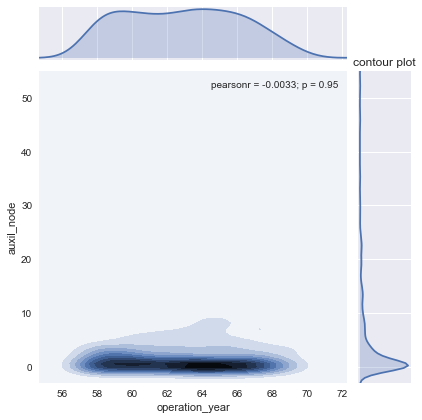

In [21]:
#contour plot
fg = sns.jointplot(x="operation_year", y="auxil_node", data=df, kind="kde")
plt.title('contour plot')
plt.show()

Observation:
Contour plot is highly densed for number of positive auxilary node values 0 to 4 and opearation year 58 to 68.

### Conclusions:

1. The dataset is highly imbalanced.
2. Univariate analysis graphs shows that positive auxilary lymph nodes is an important feature to predict survival status(75% of patients who survived have less than 5 positive lymph nodes).
3. Patients who were treated before 1960 have very less chance of survival while Patients which were having age less than 45 have high chances of survival.